In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('XOM', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,42.250000,41.000000,41.450001,41.500000,27764700.0,38.667282
2021-01-05,44.799999,41.830002,41.840000,43.500000,44035100.0,40.530769
2021-01-06,45.099998,43.700001,44.410000,44.610001,36484800.0,41.565002
2021-01-07,45.570000,44.529999,45.000000,44.959999,29528100.0,41.891109
2021-01-08,45.820000,44.950001,45.200001,45.459999,28628200.0,42.356983
...,...,...,...,...,...,...
2022-03-29,82.489998,79.760002,80.809998,82.370003,27036300.0,82.370003
2022-03-30,84.010002,82.709999,83.059998,83.779999,22079000.0,83.779999
2022-03-31,84.400002,82.550003,82.870003,82.589996,27861500.0,82.589996


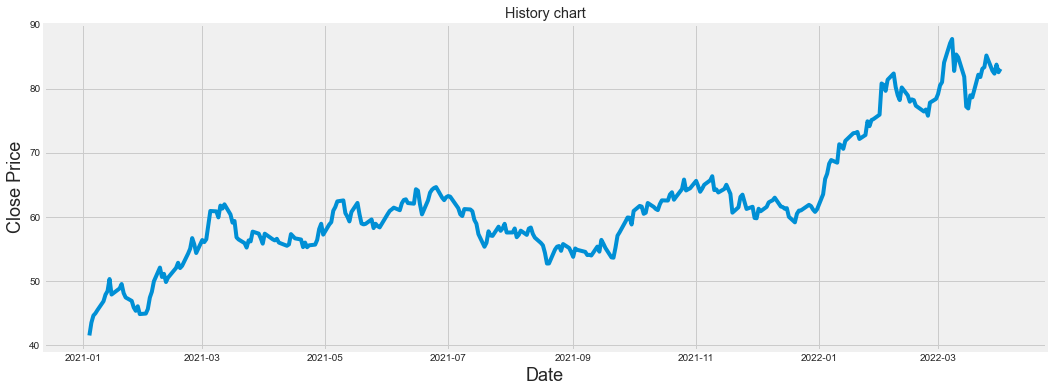

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.04321521],
       [0.06719967],
       [0.0747623 ],
       [0.0855661 ],
       [0.11538462],
       [0.13785655],
       [0.1495246 ],
       [0.19036304],
       [0.13807259],
       [0.15859983],
       [0.17350905],
       [0.14282629],
       [0.12813311],
       [0.11668111],
       [0.09442522],
       [0.08318925],
       [0.09853072],
       [0.07216941],
       [0.07389797],
       [0.08923944],
       [0.12791699],
       [0.14757999],
       [0.18258429],
       [0.2290406 ],
       [0.19727747],
       [0.20786515],
       [0.18020744],
       [0.19490062],
       [0.22774419],
       [0.2452463 ],
       [0.22731203],
       [0.23487466],
       [0.27657735],
       [0.29278305],
       [0.32843563],
       [0.30812443],
       [0.27808987],
       [0.32195337],
       [0.31482282],
       [0.32454626],
       [0.37186689],
       [0.4198358 ],
       [0.41853931],
       [0.39822819],
       [0.43798619],
       [0.42804671],
       [0.442

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.04321521, 0.06719967, 0.0747623 , 0.0855661 ,
       0.11538462, 0.13785655, 0.1495246 , 0.19036304, 0.13807259,
       0.15859983, 0.17350905, 0.14282629, 0.12813311, 0.11668111,
       0.09442522, 0.08318925, 0.09853072, 0.07216941, 0.07389797,
       0.08923944, 0.12791699, 0.14757999, 0.18258429, 0.2290406 ,
       0.19727747, 0.20786515, 0.18020744, 0.19490062, 0.22774419,
       0.2452463 , 0.22731203, 0.23487466, 0.27657735, 0.29278305,
       0.32843563, 0.30812443, 0.27808987, 0.32195337, 0.31482282,
       0.32454626, 0.37186689, 0.4198358 , 0.41853931, 0.39822819,
       0.43798619, 0.42804671, 0.44230773, 0.40816767, 0.38050996,
       0.3861279 , 0.33081248, 0.32389806, 0.31136561, 0.29645639,
       0.32065688, 0.31719967, 0.35025928, 0.34356098, 0.32821951])]
[0.30963703995310266]

[array([0.        , 0.04321521, 0.06719967, 0.0747623 , 0.0855661 ,
       0.11538462, 0.13785655, 0.1495246 , 0.19036304, 0.13807259,
       0.15859983, 0.17350905, 0.14

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 8s 188ms/step - loss: 0.1437
Epoch 2/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0142
Epoch 3/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0364
Epoch 4/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0084
Epoch 5/256
2/2 [==============================] - 0s 192ms/step - loss: 0.0105
Epoch 6/256
2/2 [==============================] - 0s 181ms/step - loss: 0.0169
Epoch 7/256
2/2 [==============================] - 0s 181ms/step - loss: 0.0137
Epoch 8/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0070
Epoch 9/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0054
Epoch 10/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0081
Epoch 11/256
2/2 [==============================] - 0s 202ms/step - loss: 0.0083
Epoch 12/256
2/2 [==============================] - 0s 185ms/step - loss: 0.0055
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.482786100042833

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2044/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


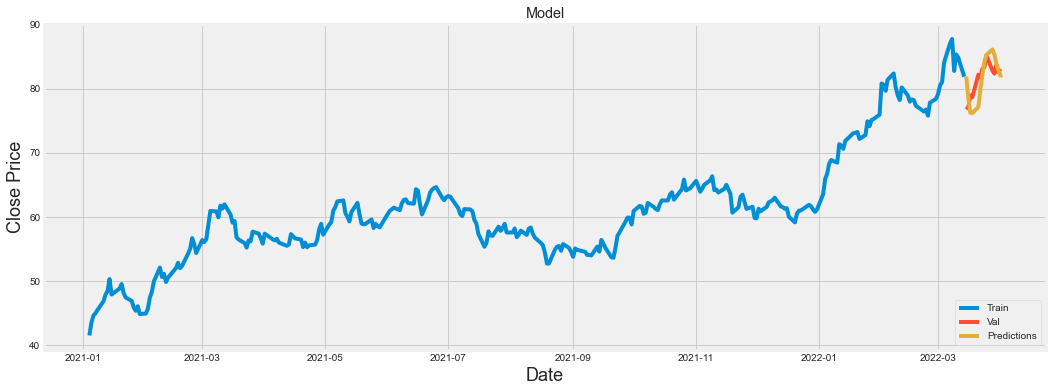

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,77.220001,81.896515
2022-03-16,76.930000,78.651497
2022-03-17,78.980003,76.268883
2022-03-18,78.669998,76.204842
2022-03-21,82.199997,77.142151
2022-03-22,81.839996,79.820969
2022-03-23,83.129997,82.203064
2022-03-24,83.379997,84.190514
2022-03-25,85.199997,85.278084
